# Assignment 3: Game Design in Kivy

## Phase 2

In this assignment we will implement the remaining features into our competitive, strategic cell-devouring game started in Lab 4.

In particular, we will implement the following features:

1. The ability to consume enemies decreasing their mass and increasing the player's mass 
2. Move by ejecting mass (As in the similar game "Osmos")
3. Creating non-player characters with simple movement
4. Adding 2 Player-local play with corresponding input handling
6. Adding Non Player Character defeat conditions
7. Adding player defeat and win conditions
8. Including a title screen which allows players to select the colors of their Cells 

As with other labs and assigments this process will be broken down into small, easy to solve chunks to make your life easier.

The following video shows a brief walkthrough of the finished application.

Run the following cell:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/FPI30p42bd8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

## Part 1: Randomly generating enemies

Randomly generating enemies is relatively simple, we need to create a list of enemies, create an instance of the enemy class with random properties, add these enemies to a list, and for each enemy in the list add them to the Game.

The enemies should be added with the following properties:
```
position: random x position in the range of 40 to 810
          random y position in the range of 40 to 440
radius:   random radius in the range of 5 to 40
velocity: velocity_x in the range of -0.5 to 0.5
          velocity_y in the range of -0.5 to 0.5
color:    a random RGBA color in the range of 0.0 to 1.0 for each RGB. Alpha should always be 1.0   
```

We wish to create 40 instances of enemies.

You will additionally need to ensure that the enemies move every frame as long as a velocity is applied to them. Achieve this by adding the appropriate code to the update function.

Finally, you must also detect collisions between each of the enemies and the player, as well as between each unique pair of the enemies, and resolve them appropriately. 

Implementation Hints: 

If you have not yet created an Enemy class as a child of Cell, create it now. It does not require any additional variables or functions. 

For initializing the enemies, you may wish to use the functions "randint" and "uniform" from the python "random" library. See more details here: https://docs.python.org/3.6/library/random.html

By default the python random library is seeded using the system time, so you will not need to provide a seed for pseudorandom operation of your application. For debugging purposes you may wish to use a fixed seed so that the enemies will spawn in a predicatable manner. 

Ensure that you are calling the enemy move command in the update.

When checking for updates you will need to ensure that the following conditions are met:
Resolving a collision between the player and each enemy
- This can be accomplished with a simple for-each loop 
Resolve collisions between each unique pair of enemies
- This can be accomplished by getting each unique pair of enemies from the list. This can be achieved with the following pseudocode:

```
from itertools import combinations # amazing library for iterating over data structures
enemy_pairs = list(combinations(self.enemies, 2)) # grab every combination of 2 enemies, create a list of pairs
```

To accomplish this step, begin by copying your code from Lab 4 into the cell below, and make the required changes to create randomly spawning enemies:

In [ ]:

# write your world class .kv file here.
dotKV = '''\
<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r*2, self.r*2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App

from kivy.uix.widget import Widget

from kivy.uix.floatlayout import FloatLayout

from kivy.graphics import Rectangle, Color

from kivy.clock import Clock

from kivy.core.window import Window

from random import random

class InputHandler (Widget):
    
    up = False
    down = False
    right = False
    left = False
    
    def __init__ (self, **kwargs):
        Widget.__init__(self, **kwargs)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        if keycode[1] == 'up':
            self.up = True
        if keycode[1] == 'down':
            self.down = True
        if keycode[1] == 'left':
            self.left = True
        if keycode[1] == 'right':
            self.right = True

    def _on_keyboard_up(self, keyboard, keycode):
        if keycode[1] == 'up':
            self.up = False
        if keycode[1] == 'down':
            self.down = False
        if keycode[1] == 'left':
            self.left = False
        if keycode[1] == 'right':
            self.right = False

class Game (FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        self.add_widget(self.world)
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        
    def oneFrame(self, args):
        self.world.update(self)
            
class World (Widget):
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        
        self.cells = []
        self.cells = self.cells + [Player(x = 100, y= 100, r = 10)]
        for i in range(0, 40):
            self.spawnEnemy();
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            for other in self.cells:
                if(other is not c):
                    c.collisionResolution(other)
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
    
class Cell (Widget):
    
    # Add your cell property declarations here. 
    def __init__(self, **kwargs):
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        Widget.__init__(self)
        
    def collisionResolution(self, obj1):
        if (pow((self.x - obj1.x), 2) + pow((self.y - obj1.y), 2) <= pow(self.r + obj1.r, 2)):
            v_x1 = obj1.v_x
            v_y1 = obj1.v_y
            obj1.v_x = self.v_x
            obj1.v_y = self.v_y
            self.v_x = v_x1
            self.v_y = v_y1
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
    def move(self):
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler
        if(self.inputHandler.up):
            self.v_y = self.v_y + 0.1
        if(self.inputHandler.down):
            self.v_y = self.v_y - 0.1
        if(self.inputHandler.left):
            self.v_x = self.v_x - 0.1
        if(self.inputHandler.right):
            self.v_x = self.v_x + 0.1
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = 0
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = 0
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
        
class GameApp(App):
    def build(self):
        # The game class should now do everything we need to run the Application
        return Game()
        
if __name__ == "__main__":
    GameApp().run()

 ## Part 2: Consuming Cells

To consume cells, we must modify the collision code that was created for the lab. 

We need to perform two actions to accomplish this task: We need to resolve collisions by changing the mass of the player and the colliding enemy, and in the event that an enemy is consumed we need to remove this enemy from the list of enemies.

In the event that a collision occurs, rather than exchanging velocities, we want the larger of the two orbs to grow and the smaller of the two orbs to shrink in size. In addition, there are two properties which we wish to maintain:
    - The total area of the two cells should be conserved
    - the larger that the bigger cell is compared to the smaller cell, the faster that rate of consuming the enemy
Additionally, when an enemy is completely consumed, it must be removed from the list of enemies. This will prevent enemies from having a negative radius and being rendered improperly, as well as messing up the computations of area.

The following algorithm can be used to resolve a collision with realistic feeling cell eating:

```
def resolveCollision(cell1, cell2):
    # check if the cells are colliding
        # if not, return

    # check which cell is larger from cell1 and cell2, 
        # create a new temp varaible for each called "bigger" and "smaller"

    # if the "smaller" cell has a negative radius, return. this cell is waiting to be cleaned up.
    
    # compute the "sum of the areas" of the two cells using the area for a circle formula
    
    # compute the "gain factor" which is the sum of the areas divided the area of the smaller cell 

    # compute the "area ratio" which is the square root of (the bigger area / the smaller area)
    
    # set the "consumption factor" to 120. This is the speed at which the smaller cell is eaten based on the framerate. Decrease this value to eat the cell faster.
    
    # decrease the smaller radius by the "gain factor" * "area ratio" / "consumption factor" 

    # if the smaller cell has a negative radius, return. this negative radius will mess with area computations and provide numerical instability.
 
    # set the bigger radius to the square root of the area sum minus the current smaller area 
```

Finally, implement a clean up function. This function should loop through each of the enemies, and any cell with a radius less than zero should be removed from the list of enemies and should no longer be drawn by Kivy. We will do this with players as well to impose win/loss conditions in a later section.

Copy your previous code into the following cell and implement these changes to experience cell eating:

In [2]:

# write your world class .kv file here.
dotKV = '''\
<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r * 2, self.r * 2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle, Color
from kivy.clock import Clock
from kivy.core.window import Window
from kivy.properties import ListProperty, NumericProperty
from random import random

class InputHandler (Widget):
    
    up = False
    down = False
    right = False
    left = False
    
    def __init__ (self, **kwargs):
        Widget.__init__(self, **kwargs)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        if keycode[1] == 'up':
            self.up = True
        if keycode[1] == 'down':
            self.down = True
        if keycode[1] == 'left':
            self.left = True
        if keycode[1] == 'right':
            self.right = True

    def _on_keyboard_up(self, keyboard, keycode):
        if keycode[1] == 'up':
            self.up = False
        if keycode[1] == 'down':
            self.down = False
        if keycode[1] == 'left':
            self.left = False
        if keycode[1] == 'right':
            self.right = False

class Game (FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        self.add_widget(self.world)
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        
    def oneFrame(self, args):
        self.world.update(self)
            
class World (Widget):
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        
        self.cells = []
        self.cells = self.cells + [Player(x = 100, y= 100, r = 20)]
        for i in range(0, 40):
            self.spawnEnemy();
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            
        from itertools import combinations # amazing library for iterating over data structures
        enemy_pairs = list(combinations(self.cells, 2)) # grab every combination of 2 cells, create a list of pairs
        for pair in enemy_pairs:
            self.collisionResolution(pair[0], pair[1]);
        for c in self.cells:
            if(c.r <= 0):
                self.remove_widget(c)
                self.inputHandler.remove(c)
                self.cells.remove(c) 
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
        
    def collisionResolution(self, obj1, obj2):        
        if (pow((obj2.x - obj1.x), 2) + pow((obj2.y - obj1.y), 2) <= pow(obj2.r + obj1.r, 2)):
            #Determine the larger and smaller objects of the collision
            larger = obj1 if obj1.r > obj2.r else obj2;
            smaller = obj1 if obj1.r <= obj2.r else obj2;
                
            #return if the smallest object should be deleted.
            if(smaller.r <= 0):
                return;
            
            import math;
            #Determine the area of the two circles
            bigArea = math.pi*pow(larger.r, 2)
            smallArea = math.pi*pow(smaller.r, 2)
            
            #Dteremine the total area
            totalArea = bigArea + smallArea
            
            #Determine the difference between the areas
            gainFactor = totalArea/smallArea
            #Find the ratio of the areas
            areaRatio = math.sqrt(bigArea/smallArea)
            consumptionFactor = 120;
            
            #Subtract from the smaller radius
            smaller.r = smaller.r - (gainFactor*areaRatio/consumptionFactor);
            #Recalculate the smaller area!
            smallArea = math.pi*pow(smaller.r, 2)
            if(smaller.r <= 0):
                return;
            #Determine how much the larger circle should grow based on conservation of area.
            larger.r = math.sqrt((totalArea - smallArea)/math.pi);
    
class Cell(Widget):
    
    # Add your cell property declarations here. 
    color = ListProperty([1,0,0,1])
    x = NumericProperty(0)
    y = NumericProperty(0)
    v_x = NumericProperty(0)
    v_y = NumericProperty(0)
    r = NumericProperty(10)
    V_MAX = NumericProperty(2.5)
    
    def __init__(self, **kwargs):
        Widget.__init__(self)
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
    def move(self):
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler
        if(self.inputHandler.up):
            self.v_y = self.v_y + 0.1
        if(self.inputHandler.down):
            self.v_y = self.v_y - 0.1
        if(self.inputHandler.left):
            self.v_x = self.v_x - 0.1
        if(self.inputHandler.right):
            self.v_x = self.v_x + 0.1
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if (self.x + self.r) > (850) and self.v_x > 0:
            self.v_x = 0
        if (self.y - self.r) < (0) and self.v_y < 0:
            self.v_y = 0
        if (self.y + self.r) > (480) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
        
class GameApp(App):
    def build(self):
        # The game class should now do everything we need to run the Application
        return Game()
        
if __name__ == "__main__":
    GameApp().run()

## Part 3: 2 Player Input

Having local 2-player competitive multiplayer is a key gameplay aspect to this game. There are a few steps in implementing this functionality:

1. You will need to create a second instance of the player class
2. You will need to modify the input handler to accept a second set of keys ('w','a','s','d')
3. You will need to move the second player based on the second set of keys. ("w" moves up, "a" moves left, "s" moves down, "d" moves right.

For step 1, you simply need to create a new instance of the Player class. 

For step 2, tere are two methods to implement this. A "hard-coded" method, and an "adaptive method" with reusable code. If you plan to extend the assignment for the project, the second method is preferable as more flexibility is provided, and will help learn some of the intracacies of python and Kivy. If not, the first method will also accomplish the goal:

- Hard-coded method:
    - Modify the input handler to add the following keys: "w", "a", "s", "d"
    - In the update function, check if any of the "w", "a", "s" and "d" keys are down, and move player 2 accordingly. 
 
 
 
- Adaptive Method:
    - This method will allow you to change key mappings per player easily, and add mappings for additional players.
    - Implement this in the following method.


- Add a variable for the number of players in input handler
- Modify the up/down/left/right_key and up/down/left/right_bool varaibles into lists (they will be of length times the number of players)
- Modify the constructor to pass in the number of players, as well as a list of their inputs, eg.
    - One way to accomplish this is with the following code:

``` 
# declare the function as follows
def __init__ (self, players, *args, **kwargs):

#call the function as follows
InputHandler (2, "up", "down", "left", "right" "w", "s", "a", "d")
```

- in this code snipped, the *args will capture the last 8 arguments, which can be referenced using args [0] to args [7]
- Map these inputs to the corresponding key varaibles
- Initialize the lists of bools to be the same length as the keys, and each to False  
- In the keyboard down and keyboard up function, for each player check if their corrsponding key is down or up (look in the appropriate list) and set or clear the appropriate bool.
- Finally, in the movement function, check the bool corresponding the appropriate player. 

If you implement this second method correctly, changing the keys for each player should be trivial, as well as adding additional players and correct movement.

Whichever method you choose to implement, copy your code into the cell below and get this function working properly.

In [1]:

# write your world class .kv file here.
dotKV = '''\
<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r * 2, self.r * 2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle, Color
from kivy.clock import Clock
from kivy.core.window import Window
from kivy.properties import ListProperty, NumericProperty, DictProperty
from random import random

class InputHandler (Widget):
    
    players = [];
    playerKeys = {};
    
    def __init__ (self, **kwargs):
        Widget.__init__(self)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def linkPlayer(self, player):
        self.players += [player]
        self.playerKeys[len(self.players)-1] = player.keys
        
    def remove(self, player):
        i=0
        for p in self.players:
            if player == p:
                self.players[i] = None
                self.playerKeys.pop(i)
            i += 1
                
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = True
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = True
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = True
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = True
            i += 1

    def _on_keyboard_up(self, keyboard, keycode):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = False
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = False
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = False
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = False
            i += 1

class Game (FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        self.add_widget(self.world)
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        
    def oneFrame(self, args):
        self.world.update(self)
            
class World (Widget):
       
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
        self.cells = []
        p1 = Player(x = 100, y= 100, r = 50, keys = ['up','down','left','right'])
        p2 = Player(x = 800, y= 400, r = 50, keys = ['w','s','a','d'])
        self.cells = self.cells + [p1]
        self.cells = self.cells + [p2]
        self.inputHandler.linkPlayer(p1)
        self.inputHandler.linkPlayer(p2)
        for i in range(0, 40):
            self.spawnEnemy();
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            
        from itertools import combinations # amazing library for iterating over data structures
        enemy_pairs = list(combinations(self.cells, 2)) # grab every combination of 2 cells, create a list of pairs
        for pair in enemy_pairs:
            self.collisionResolution(pair[0], pair[1]);
        for c in self.cells:
            if(c.r <= 0):
                self.remove_widget(c)
                self.inputHandler.remove(c)
                self.cells.remove(c)       
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
        
    def collisionResolution(self, obj1, obj2):        
        if (pow((obj2.x - obj1.x), 2) + pow((obj2.y - obj1.y), 2) <= pow(obj2.r + obj1.r, 2)):
            #Determine the larger and smaller objects of the collision
            larger = obj1 if obj1.r > obj2.r else obj2;
            smaller = obj1 if obj1.r <= obj2.r else obj2;
                
            #return if the smallest object should be deleted.
            if(smaller.r <= 0):
                return;
            
            import math;
            #Determine the area of the two circles
            bigArea = math.pi*pow(larger.r, 2)
            smallArea = math.pi*pow(smaller.r, 2)
            
            #Dteremine the total area
            totalArea = bigArea + smallArea
            
            #Determine the difference between the areas
            gainFactor = totalArea/smallArea
            #Find the ratio of the areas
            areaRatio = math.sqrt(bigArea/smallArea)
            consumptionFactor = 120;
            
            #Subtract from the smaller radius
            smaller.r = smaller.r - (gainFactor*areaRatio/consumptionFactor);
            #Recalculate the smaller area!
            smallArea = math.pi*pow(smaller.r, 2)
            if(smaller.r <= 0):
                return;
            #Determine how much the larger circle should grow based on conservation of area.
            larger.r = math.sqrt((totalArea - smallArea)/math.pi);
    
class Cell(Widget):
    
    # Add your cell property declarations here. 
    color = ListProperty([1,0,0,1])
    x = NumericProperty(0)
    y = NumericProperty(0)
    v_x = NumericProperty(0)
    v_y = NumericProperty(0)
    r = NumericProperty(10)
    V_MAX = NumericProperty(2.5)
    
    def __init__(self, **kwargs):
        Widget.__init__(self)
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
            
    keys = [];
    up = False;
    down = False;
    left = False;
    right = False;
        
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.keys = kwargs.pop('keys', ['up','down','left','right'])
        
        
    def move(self):
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler
        if(self.up):
            self.v_y = self.v_y + 0.1
        if(self.down):
            self.v_y = self.v_y - 0.1
        if(self.left):
            self.v_x = self.v_x - 0.1
        if(self.right):
            self.v_x = self.v_x + 0.1
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if (self.x + self.r) > (850) and self.v_x > 0:
            self.v_x = 0
        if (self.y - self.r) < (0) and self.v_y < 0:
            self.v_y = 0
        if (self.y + self.r) > (480) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
        
class GameApp(App):
    def build(self):
        # The game class should now do everything we need to run the Application
        return Game()
        
if __name__ == "__main__":
    GameApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-22_109.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max si

## Part 4: Expelling Mass to Move

To add an element of strategy to the game, we will cause the cells to expel mass when they change direction and velocity through user input. This expellation will appear in the form of a new enemy cell appearing in the opposite direction of which the player is moving which takes some of the player's mass. With this game dynamic, every movement must be carefully planned as tradeoffs exist to movement. 

Expelling mass to move is non-trivial, but not impossible either. As with other algorithms this will be explained in a series of steps. This objective has the following properties:
- The player should move in the 4 cardinal directions and the 4 intermediate directions (8 total directions)
- The player must only be able to move and expel mass once every 10 frames
- The expelled area should be 10% of the players area
- The player's area should then become 90% of its previous value
- The player's velocity should increase by 1.0 in the apporiate direction of movement
- The enemy's velocity should originally be equal to the players but be changed in the opposite direction of the players, multiplied by 9 to correspond with an equilibrium in momentum.


How to implement this:

First, we must no longer allow a player to move every frame, as this would cause the player to lose all of their mass in a very brief period of time. 
- to accomplish this we will add a cooldown to movement
- create a counter variable in the player class called cooldown and set it to zero
- increment this counter by one in the update function for each player
- only allow a change in velocity if the counter is greater than 10
- when the user moves, set the counter back to zero

Next, to compensate for the cooldown we want to up the movement speed.
- Increase the speed of a successful change in velocity by 10x from the lab speed, or 1.0.
- If the player is moving in a diagonal direction, incrememnt or decrement the x and y velocity by sqrt(2), or approximately 0.707.
    - Whenever the player successfully changes velocity:
        - Create a new instance of an enemy class
        - set the enemies radius such that it's area is 10% of the players area 
            - this is equal to the players radius * 0.316227766 
        - Set its position to the a position on the circumference of the player opposite to the direction of movement 
        - Set the players radius such that it's areas is 90% of its previous area
            - this is equal to the players radius * 0.9486832
        - set the velocity of the enemy to the original velocity of the player 
            - add the change in velocity to the enemy in the opposite direction, eg.
                - Player gains (v_x, v_y) += (1.0, 1.0)
                - Enemy gains (v_x, v_y) += (-1.0, -1.0) * 9.0
        - set a random color for the enemy
        - add the enemy created to the list of enemies as well as canvas for drawing
       
From here the expel will act as any other enemy, and is no longer a portion of the player. It can potentially gain enough mass that it will consume you. 

Implement this update in the following code cell:

In [1]:

# write your world class .kv file here.
dotKV = '''\
<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r * 2, self.r * 2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle, Color
from kivy.clock import Clock
from kivy.core.window import Window
from kivy.properties import ListProperty, NumericProperty, DictProperty
from random import random

class InputHandler (Widget):
    
    players = [];
    playerKeys = {};
    
    def __init__ (self, **kwargs):
        Widget.__init__(self)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def linkPlayer(self, player):
        self.players += [player]
        self.playerKeys[len(self.players)-1] = player.keys
        
    def remove(self, player):
        i=0
        for p in self.players:
            if player == p:
                self.players[i] = None
                self.playerKeys.pop(i)
            i += 1
                
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = True
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = True
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = True
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = True
            i += 1

    def _on_keyboard_up(self, keyboard, keycode):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = False
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = False
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = False
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = False
            i += 1

class Game (FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        self.add_widget(self.world)
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        
    def oneFrame(self, args):
        self.world.update(self)
            
class World (Widget):
       
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
        self.cells = []
        p1 = Player(x = 100, y= 100, r = 50, keys = ['up','down','left','right'])
        p2 = Player(x = 800, y= 400, r = 50, keys = ['w','s','a','d'])
        self.cells = self.cells + [p1]
        self.cells = self.cells + [p2]
        self.inputHandler.linkPlayer(p1)
        self.inputHandler.linkPlayer(p2)
        for i in range(0, 40):
            self.spawnEnemy();
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            
        from itertools import combinations # amazing library for iterating over data structures
        enemy_pairs = list(combinations(self.cells, 2)) # grab every combination of 2 cells, create a list of pairs
        for pair in enemy_pairs:
            self.collisionResolution(pair[0], pair[1]);
        for c in self.cells:
            if(c.r <= 0):
                self.remove_widget(c)
                self.inputHandler.remove(c)
                self.cells.remove(c)       
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
        
    def collisionResolution(self, obj1, obj2):        
        if (pow((obj2.x - obj1.x), 2) + pow((obj2.y - obj1.y), 2) <= pow(obj2.r + obj1.r, 2)):
            #Determine the larger and smaller objects of the collision
            larger = obj1 if obj1.r > obj2.r else obj2;
            smaller = obj1 if obj1.r <= obj2.r else obj2;
                
            #return if the smallest object should be deleted.
            if(smaller.r <= 0):
                return;
            
            import math;
            #Determine the area of the two circles
            bigArea = math.pi*pow(larger.r, 2)
            smallArea = math.pi*pow(smaller.r, 2)
            
            #Dteremine the total area
            totalArea = bigArea + smallArea
            
            #Determine the difference between the areas
            gainFactor = totalArea/smallArea
            #Find the ratio of the areas
            areaRatio = math.sqrt(bigArea/smallArea)
            consumptionFactor = 120;
            
            #Subtract from the smaller radius
            smaller.r = smaller.r - (gainFactor*areaRatio/consumptionFactor);
            #Recalculate the smaller area!
            smallArea = math.pi*pow(smaller.r, 2)
            if(smaller.r <= 0):
                return;
            #Determine how much the larger circle should grow based on conservation of area.
            larger.r = math.sqrt((totalArea - smallArea)/math.pi);
    
class Cell(Widget):
    
    # Add your cell property declarations here. 
    color = ListProperty([1,0,0,1])
    x = NumericProperty(0)
    y = NumericProperty(0)
    v_x = NumericProperty(0)
    v_y = NumericProperty(0)
    r = NumericProperty(10)
    V_MAX = NumericProperty(2.5)
    
    def __init__(self, **kwargs):
        Widget.__init__(self)
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
            
    cooldown = 0;
    keys = [];
    up = False;
    down = False;
    left = False;
    right = False;
        
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.keys = kwargs.pop('keys', ['up','down','left','right'])
        
        
    def move(self):
        self.cooldown += 1
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler    
        if(self.cooldown >= 10):
            if(self.up or self.left or self.right or self.down):
                self.cooldown = 0
                from random import randint
                color_r = randint(0, 100) / 100;
                color_g = randint(0, 100) / 100;
                color_b = randint(0, 100) / 100;
                enemy = Enemy(color = [color_r, color_g, color_b, 1], r = self.r*0.316227766)
                self.r = self.r * 0.9486832

                if(self.up and self.left):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to bottom right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif (self.up and self.right):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to bottom left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down and self.left):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to top right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif(self.down and self.right):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to top left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.up):
                    self.v_y = self.v_y + 1
                    #Set the enemy location to bottom
                    enemy.x = self.x
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down):
                    self.v_y = self.v_y - 1
                    #Set the enemy location to top
                    enemy.x = self.x
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.left):
                    self.v_x = self.v_x - 1
                    #Set the enemy location to right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y
                elif (self.right):
                    self.v_x = self.v_x + 1
                    #Set the enemy location to left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y

                enemy.v_y = self.v_y * -1 * 9
                enemy.v_x = self.v_x * -1 * 9

                self.parent.cells += [enemy]
                self.parent.add_widget(enemy)
                
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if (self.x + self.r) > (850) and self.v_x > 0:
            self.v_x = 0
        if (self.y - self.r) < (0) and self.v_y < 0:
            self.v_y = 0
        if (self.y + self.r) > (480) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
        
class GameApp(App):
    def build(self):
        # The game class should now do everything we need to run the Application
        return Game()
        
if __name__ == "__main__":
    GameApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-22_112.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max si

## Part 5: Title Screen

To add polish to our game, we will add a title screen. This screen will allow each player to choose a player color as well as a start menu to start the game. Our screen will look as follows:

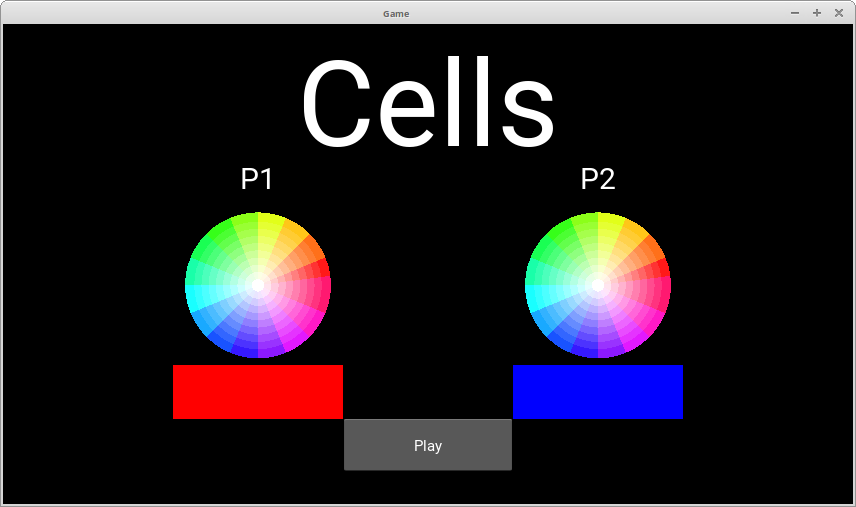

In order to implement this, we will need to learn to work with multiple screens in Kivy. Two links that explain this well are: 

https://kivy.org/docs/api-kivy.uix.screenmanager.html

https://pythonprogramming.net/kivy-screen-manager-tutorial/

There are a few portions of this: We need cause our root widget in each of the screens to inherit from the "Screen" class. We will also need to add each of these Screens to the Screen Manager. Each screen will also need a "name" property. This is how the ScreenManager will refer to the correct screens. 

In addition, Kivy has the ability to use different transitions between screens. We'll use the Fade Transition to begin the game.

Some example code which demonstrates this process is included in the following cell, which is borrowed from the second tutorial:

In [1]:
dotKv = '''
#:import FadeTransition kivy.uix.screenmanager.FadeTransition

ScreenManagement:
    transition: FadeTransition()
    MainScreen:
    AnotherScreen:

<MainScreen>:
    name: 'main'

    Button:
        on_release: app.root.current = 'other'
        text: 'Another Screen'
        font_size: 50
            
<AnotherScreen>:
    name: 'other'

    Button:
        on_release: app.root.current = 'main'
        text: 'back to the home screen'
        font_size: 50

'''
from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.lang import Builder
from kivy.uix.screenmanager import ScreenManager, Screen, FadeTransition

class MainScreen(Screen):
    pass

class AnotherScreen(Screen):
    pass

class ScreenManagement(ScreenManager):
    pass

presentation = Builder.load_string(dotKv)

class MainApp(App):
    def build(self):
        return presentation

MainApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-23_11.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max siz

BuilderException: Parser: File "<inline>", line 4:
...
      2:
      3:ScreenManagement:
>>    4:    transition: FadeTransition()
      5:    MainScreen:
      6:    AnotherScreen:
...
BuilderException: Parser: File "<inline>", line 4:
...
      2:
      3:ScreenManagement:
>>    4:    transition: FadeTransition()
      5:    MainScreen:
      6:    AnotherScreen:
...
NameError: name 'FadeTransition' is not defined
  File "C:\Users\Quinn\Anaconda3\lib\site-packages\kivy\lang\builder.py", line 249, in create_handler
    return eval(value, idmap), bound_list
  File "<string>", line 4, in <module>

  File "C:\Users\Quinn\Anaconda3\lib\site-packages\kivy\lang\builder.py", line 597, in _apply_rule
    rctx['ids'])
  File "C:\Users\Quinn\Anaconda3\lib\site-packages\kivy\lang\builder.py", line 254, in create_handler
    cause=tb)


Implementation suggestions:

Create a new class called "Title". This class should inherit from "Screen". Be sure to import Screen and ScreenManager from kivy.uix.screenmanager.

Write the .kv code for the Title class to implement the interface. As this is an unconventional layout, it may be a good idea to begin by boxing out the layouts and considering the size_hints to correctly create the interface. Be sure to set a "name" property in both this class and the Game class.

We can make use of the "ColorWheel" widget to get only the wheel portion of the ColorPicker widget.
    
The most significant challenge in achieving this objective is learning to use the Screen Manager. Read the given tutorials and study the sample code to understand how to make this work.

You may wish to make the following changes: 
    Make the Game class inherit from Screen
    Move the initialization code from the Game class to a new function called "start"
    Do not invoke this function until the Game class is brought into focus by clicking Play on the title screen.
    Create a new widget called ScreenManagment which inherits from ScreenManager which includes the transition FadeTransition and an instance to the Game and Title class

To transition between screens, set ScreenManagement.current equal to 'Game' (Or whatever you set the game's name to)

Finally, ensure that your original GameApp returns ScreenManagement rather than the game class.

This *should* be all the requirements necessary to make this work.

Include your code with this feature implemented in the following cell:

In [1]:

# write your world class .kv file here.
dotKV = '''\
#:import FadeTransition kivy.uix.screenmanager.FadeTransition

<TitleScreen>
    name: 'Title'
    size: (850, 480)
    BoxLayout:
        orientation: 'vertical'
        BoxLayout:
            size_hint_y: 1/5
            orientation: 'horizontal'
            Label:
                size_hint_x: 1/3
            Label:
                text: "Cells"
            Label:
                size_hint_x: 1/3
        BoxLayout:
            size_hint_y: 3/5
            orientation: 'horizontal'
            Label:
                size_hint_x: 1/5
            BoxLayout:
                orientation: 'vertical'
                Label:
                    text: "P1"
                ColorWheel:
                    id: p1color
                Label:
                    text: "Color"
                    canvas:
                        Color:
                            rgba: p1color.color
                        Rectangle:
                            pos: self.pos
                            size: self.size
            Label:
                size_hint_x: 1/5
            BoxLayout:
                orientation: 'vertical'
                Label:
                    text: "P2"
                ColorWheel:
                    id: p2color
                Label:
                    text: "Color"
                    canvas:
                        Color:
                            rgba: p2color.color
                        Rectangle:
                            pos: self.pos
                            size: self.size
            Label:
                size_hint_x: 1/5
        BoxLayout:
            size_hint_y: 1/5
            orientation: 'horizontal'
            Label:
                size_hint_y: 1/3
            Button:
                text: "Play Game"
                on_press: root.parent.playGame()
            Label:
                size_hint_y: 1/3
        
<GameScreen>
    name: 'GameScreen'

<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r * 2, self.r * 2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle, Color
from kivy.clock import Clock
from kivy.core.window import Window
from kivy.properties import ListProperty, NumericProperty, DictProperty
from kivy.uix.screenmanager import ScreenManager, Screen, FadeTransition
from random import random

class TitleScreen(Screen):
    pass

class InputHandler (Widget):
    
    players = [];
    playerKeys = {};
    
    def __init__ (self, **kwargs):
        Widget.__init__(self)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def linkPlayer(self, player):
        self.players += [player]
        self.playerKeys[len(self.players)-1] = player.keys
        
    def remove(self, player):
        i=0
        for p in self.players:
            if player == p:
                self.players[i] = None
                self.playerKeys.pop(i)
            i += 1
                
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = True
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = True
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = True
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = True
            i += 1

    def _on_keyboard_up(self, keyboard, keycode):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = False
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = False
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = False
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = False
            i += 1

class GameScreen(Screen):        
    def startGame(self, colors):
        game = Game()
        game.world.setPlayerColors(colors)
        self.add_widget(game)
        
class Game(FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        self.add_widget(self.world)
        
    def oneFrame(self, args):
        self.world.update(self)
            
class World (Widget):
    
    def setPlayerColors(self, colors):
        self.p1.color = colors['p1']
        self.p2.color = colors['p2']
       
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
        self.cells = []
        for i in range(0, 40):
            self.spawnEnemy();
            
        self.p1 = Player(x = 100, y= 100, r = 50, keys = ['up','down','left','right'])
        self.p2 = Player(x = 800, y= 400, r = 50, keys = ['w','s','a','d'])
        self.cells = self.cells + [self.p1]
        self.cells = self.cells + [self.p2]
        self.inputHandler.linkPlayer(self.p1)
        self.inputHandler.linkPlayer(self.p2)
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            
        from itertools import combinations # amazing library for iterating over data structures
        enemy_pairs = list(combinations(self.cells, 2)) # grab every combination of 2 cells, create a list of pairs
        for pair in enemy_pairs:
            self.collisionResolution(pair[0], pair[1]);
        for c in self.cells:
            if(c.r <= 0):
                self.remove_widget(c)
                self.inputHandler.remove(c)
                self.cells.remove(c)       
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
        
    def collisionResolution(self, obj1, obj2):        
        if (pow((obj2.x - obj1.x), 2) + pow((obj2.y - obj1.y), 2) <= pow(obj2.r + obj1.r, 2)):
            #Determine the larger and smaller objects of the collision
            larger = obj1 if obj1.r > obj2.r else obj2;
            smaller = obj1 if obj1.r <= obj2.r else obj2;
                
            #return if the smallest object should be deleted.
            if(smaller.r <= 0):
                return;
            
            import math;
            #Determine the area of the two circles
            bigArea = math.pi*pow(larger.r, 2)
            smallArea = math.pi*pow(smaller.r, 2)
            
            #Dteremine the total area
            totalArea = bigArea + smallArea
            
            #Determine the difference between the areas
            gainFactor = totalArea/smallArea
            #Find the ratio of the areas
            areaRatio = math.sqrt(bigArea/smallArea)
            consumptionFactor = 120;
            
            #Subtract from the smaller radius
            smaller.r = smaller.r - (gainFactor*areaRatio/consumptionFactor);
            #Recalculate the smaller area!
            smallArea = math.pi*pow(smaller.r, 2)
            if(smaller.r <= 0):
                return;
            #Determine how much the larger circle should grow based on conservation of area.
            larger.r = math.sqrt((totalArea - smallArea)/math.pi);
    
class Cell(Widget):
    
    # Add your cell property declarations here. 
    color = ListProperty([1,0,0,1])
    x = NumericProperty(0)
    y = NumericProperty(0)
    v_x = NumericProperty(0)
    v_y = NumericProperty(0)
    r = NumericProperty(10)
    V_MAX = NumericProperty(2.5)
    
    def __init__(self, **kwargs):
        Widget.__init__(self)
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
            
    cooldown = 0;
    keys = [];
    up = False;
    down = False;
    left = False;
    right = False;
        
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.keys = kwargs.pop('keys', ['up','down','left','right'])
        
        
    def move(self):
        self.cooldown += 1
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler    
        if(self.cooldown >= 10):
            if(self.up or self.left or self.right or self.down):
                self.cooldown = 0
                from random import randint
                color_r = randint(0, 100) / 100;
                color_g = randint(0, 100) / 100;
                color_b = randint(0, 100) / 100;
                enemy = Enemy(color = [color_r, color_g, color_b, 1], r = self.r*0.316227766)
                self.r = self.r * 0.9486832

                if(self.up and self.left):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to bottom right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif (self.up and self.right):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to bottom left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down and self.left):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to top right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif(self.down and self.right):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to top left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.up):
                    self.v_y = self.v_y + 1
                    #Set the enemy location to bottom
                    enemy.x = self.x
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down):
                    self.v_y = self.v_y - 1
                    #Set the enemy location to top
                    enemy.x = self.x
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.left):
                    self.v_x = self.v_x - 1
                    #Set the enemy location to right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y
                elif (self.right):
                    self.v_x = self.v_x + 1
                    #Set the enemy location to left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y

                enemy.v_y = self.v_y * -1 * 9
                enemy.v_x = self.v_x * -1 * 9

                self.parent.cells += [enemy]
                self.parent.add_widget(enemy)
                
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if (self.x + self.r) > (850) and self.v_x > 0:
            self.v_x = 0
        if (self.y - self.r) < (0) and self.v_y < 0:
            self.v_y = 0
        if (self.y + self.r) > (480) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
            
class ScreenManagement(ScreenManager):    
    def playGame(self):
        gameScreen = GameScreen()
        self.add_widget(gameScreen)
        titleScreen = self.get_screen('Title')
        colors = {'p1':titleScreen.ids.p1color.color, 'p2':titleScreen.ids.p2color.color}
        gameScreen.startGame(colors)
        self.current = 'GameScreen'
                 
class GameApp(App):
    def build(self):
        self.sm = ScreenManagement()
        self.sm.add_widget(TitleScreen())
        self.sm.current = 'Title'
        return self.sm
        
GameApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-23_60.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max siz

## Part 6: Win Conditions

The final step of our application is to impose win conditions for the game. 

To impose win conditions we must:
1. Check to see that one of the players radius is zero or negative
2. If so, remove the player
3. Stop the update function
    - The simplest way to stop this is to return 'False' from the function called by the clock scheduler which will automatically unschedule the event
4. Draw a label on the screen which shows that the player which is still alive win.

A screenshot showing the win condition is shown in the following image:

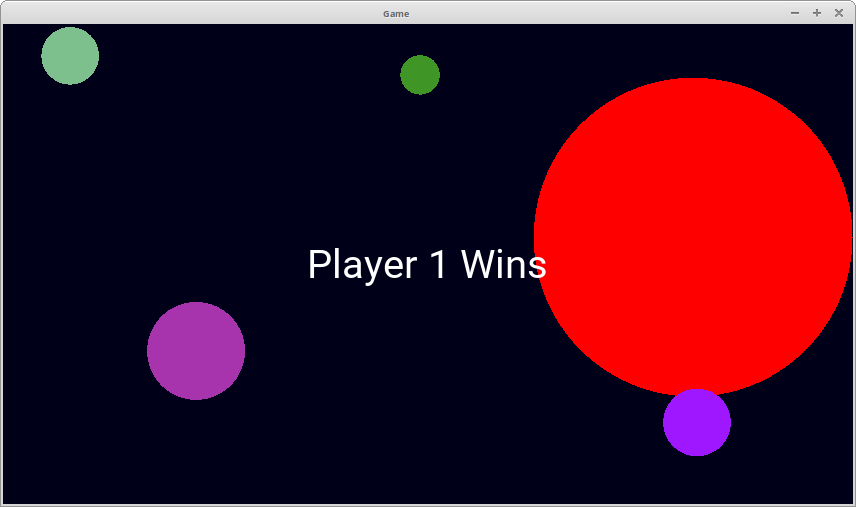
    
Include your final code in the following cell:

In [1]:

# write your world class .kv file here.
dotKV = '''\
#:import FadeTransition kivy.uix.screenmanager.FadeTransition

<TitleScreen>
    name: 'Title'
    size: (850, 480)
    BoxLayout:
        orientation: 'vertical'
        BoxLayout:
            size_hint_y: 1/5
            orientation: 'horizontal'
            Label:
                size_hint_x: 1/3
            Label:
                text: "Cells"
            Label:
                size_hint_x: 1/3
        BoxLayout:
            size_hint_y: 3/5
            orientation: 'horizontal'
            Label:
                size_hint_x: 1/5
            BoxLayout:
                orientation: 'vertical'
                Label:
                    text: "Player 1"
                ColorWheel:
                    id: p1color
                    color: [1, 0, 0, 1]
                Label:
                    text: "Color"
                    canvas:
                        Color:
                            rgba: p1color.color
                        Rectangle:
                            pos: self.pos
                            size: self.size
            Label:
                size_hint_x: 1/5
            BoxLayout:
                orientation: 'vertical'
                Label:
                    text: "Player 2"
                ColorWheel:
                    id: p2color
                    color: [0, 1, 1, 1]
                Label:
                    text: "Color"
                    canvas:
                        Color:
                            rgba: p2color.color
                        Rectangle:
                            pos: self.pos
                            size: self.size
            Label:
                size_hint_x: 1/5
        BoxLayout:
            size_hint_y: 1/5
            orientation: 'horizontal'
            Label:
                size_hint_y: 1/3
            Button:
                text: "Play Game"
                on_press: root.parent.playGame()
            Label:
                size_hint_y: 1/3
        
<GameScreen>
    name: 'GameScreen'
    
<GameOver>
    name: 'GameOver'
    FloatLayout:
        pos: (0,0)
        size: (850,480)
        BoxLayout:
            orientation: 'vertical'
            Label:
                id: winText
            Button:
                text: "Play Again!"
                on_press: root.parent.titleScreen()

<World>
    canvas:
        Color:
            rgba: 0, 0, 0.1, 1
        Rectangle:
            pos: (0, 0)
            size: (self.width, self.height)
            
<Cell>
    canvas:
        Color:
            rgba: self.color
        Ellipse:
            pos: (self.x - self.r, self.y-self.r)
            size: (self.r * 2, self.r * 2)
\
'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')
Config.set('graphics', 'width', '850')
Config.set('graphics', 'height', '480')

from kivy.app import App
from kivy.uix.widget import Widget
from kivy.uix.label import Label
from kivy.uix.floatlayout import FloatLayout
from kivy.graphics import Rectangle, Color
from kivy.clock import Clock
from kivy.core.window import Window
from kivy.properties import ListProperty, NumericProperty, DictProperty
from kivy.uix.screenmanager import ScreenManager, Screen, FadeTransition
from random import random

class TitleScreen(Screen):
    pass

class GameOver(Screen):        
    def setText(self, text):
        self.ids.winText.text = text

class InputHandler (Widget):
    
    players = [];
    playerKeys = {};
    
    def __init__ (self, **kwargs):
        Widget.__init__(self)
        self._keyboard = Window.request_keyboard(self._keyboard_closed, self)
        self._keyboard.bind(on_key_down=self._on_keyboard_down)
        self._keyboard.bind(on_key_up=self._on_keyboard_up)
        
    def linkPlayer(self, player):
        self.players += [player]
        self.playerKeys[len(self.players)-1] = player.keys
        
    def remove(self, player):
        i=0
        for p in self.players:
            if player == p:
                self.players[i] = None
                self.playerKeys.pop(i)
            i += 1
                
        
    def _keyboard_closed(self):
        self._keyboard.unbind(on_key_down=self._on_keyboard_down)
        self._keyboard = None

    def _on_keyboard_down(self, keyboard, keycode, text, modifiers):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = True
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = True
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = True
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = True
            i += 1

    def _on_keyboard_up(self, keyboard, keycode):
        i=0
        for p in self.players:
            if(p is None):
                i += 1
                continue;
            if keycode[1] == self.playerKeys.get(i)[0]:
                p.up = False
            if keycode[1] == self.playerKeys.get(i)[1]:
                p.down = False
            if keycode[1] == self.playerKeys.get(i)[2]:
                p.left = False
            if keycode[1] == self.playerKeys.get(i)[3]:
                p.right = False
            i += 1

class GameScreen(Screen):        
    def startGame(self, colors):
        game = Game()
        game.world.setPlayerColors(colors)
        self.add_widget(game)
        
class Game(FloatLayout):
    def __init__(self, **kwargs):
        FloatLayout.__init__(self, **kwargs)
        self.world = World()
        Clock.schedule_interval(self.oneFrame, 1/60)
        self.counter = 0;
        self.add_widget(self.world)
        
    def oneFrame(self, args):
        return self.world.update(self)
            
class World (Widget):
    
    def setPlayerColors(self, colors):
        self.p1.color = colors['p1']
        self.p2.color = colors['p2']
       
    def __init__(self, **kwargs):
        Widget.__init__(self, **kwargs)
        self.inputHandler = InputHandler()
        
        self.cells = []
        for i in range(0, 40):
            self.spawnEnemy();
            
        self.p1 = Player(x = 100, y= 100, r = 50, keys = ['up','down','left','right'])
        self.p2 = Player(x = 800, y= 400, r = 50, keys = ['w','s','a','d'])
        self.cells = self.cells + [self.p1]
        self.cells = self.cells + [self.p2]
        self.inputHandler.linkPlayer(self.p1)
        self.inputHandler.linkPlayer(self.p2)
        
        for c in self.cells:
            self.add_widget(c)
            
        width = 850
        height = 480
    
    def update(self, *args):                    
        for c in self.cells:
            c.move()
            
        from itertools import combinations # amazing library for iterating over data structures
        enemy_pairs = list(combinations(self.cells, 2)) # grab every combination of 2 cells, create a list of pairs
        for pair in enemy_pairs:
            self.collisionResolution(pair[0], pair[1]);
        for c in self.cells:
            if(c.r <= 0):
                if(isinstance(c, Player)):
                    screen = GameOver()
                    if(self.p1.r <= 0):
                        screen.setText("Player 2 wins!")
                        self.parent.parent.parent.add_widget(screen)
                        self.parent.parent.parent.remove_widget(self.parent.parent.parent.current_screen)
                        self.parent.parent.parent.current = 'GameOver'
                    else:
                        screen.setText("Player 1 wins!")
                        self.parent.parent.parent.add_widget(screen)
                        self.parent.parent.parent.remove_widget(self.parent.parent.parent.current_screen)
                        self.parent.parent.parent.current = 'GameOver'
                    return False
                self.remove_widget(c)
                self.cells.remove(c)       
                    
    def spawnEnemy(self):
        from random import randint
        locx = randint(40, 810);
        locy = randint(40, 440);
        radius = randint(5, 40);
        velocity_x = (randint(0, 100) / 100) - 0.5;
        velocity_y = (randint(0, 100) / 100) - 0.5;
        color_r = randint(0, 100) / 100;
        color_g = randint(0, 100) / 100;
        color_b = randint(0, 100) / 100;
        
        self.cells = self.cells + [Enemy(x = locx, y = locy, r = radius, color = [color_r, color_g, color_b, 1.0], v_x = velocity_x, v_y = velocity_y)]
        
    def collisionResolution(self, obj1, obj2):        
        if (pow((obj2.x - obj1.x), 2) + pow((obj2.y - obj1.y), 2) <= pow(obj2.r + obj1.r, 2)):
            #Determine the larger and smaller objects of the collision
            larger = obj1 if obj1.r > obj2.r else obj2;
            smaller = obj1 if obj1.r <= obj2.r else obj2;
                
            #return if the smallest object should be deleted.
            if(smaller.r <= 0):
                return;
            
            import math;
            #Determine the area of the two circles
            bigArea = math.pi*pow(larger.r, 2)
            smallArea = math.pi*pow(smaller.r, 2)
            
            #Dteremine the total area
            totalArea = bigArea + smallArea
            
            #Determine the difference between the areas
            gainFactor = totalArea/smallArea
            #Find the ratio of the areas
            areaRatio = math.sqrt(bigArea/smallArea)
            consumptionFactor = 120;
            
            #Subtract from the smaller radius
            smaller.r = smaller.r - (gainFactor*areaRatio/consumptionFactor);
            #Recalculate the smaller area!
            smallArea = math.pi*pow(smaller.r, 2)
            if(smaller.r <= 0):
                return;
            #Determine how much the larger circle should grow based on conservation of area.
            larger.r = math.sqrt((totalArea - smallArea)/math.pi);
    
class Cell(Widget):
    
    # Add your cell property declarations here. 
    color = ListProperty([1,0,0,1])
    x = NumericProperty(0)
    y = NumericProperty(0)
    v_x = NumericProperty(0)
    v_y = NumericProperty(0)
    r = NumericProperty(10)
    V_MAX = NumericProperty(2.5)
    
    def __init__(self, **kwargs):
        Widget.__init__(self)
        self.color = kwargs.pop('color', [1, 0, 0, 1])
        self.x = kwargs.pop('x', 0)
        self.y = kwargs.pop('y', 0)
        self.v_x = kwargs.pop('v_x', 0)
        self.v_y = kwargs.pop('v_y', 0)
        self.r = kwargs.pop('r', 0)
        self.V_MAX = kwargs.pop('V_MAX', 2.5)
        
    def move (self):        
        #Check if v_x or v_y is greater than V_MAX or less than negative V_MAX
        #and if so, clamp it to this value
        if(self.v_y > self.V_MAX):
            self.v_y = self.V_MAX
        if(abs(self.v_y) > self.V_MAX) and (self.v_y < 0):
            self.v_y = -self.V_MAX
        if(self.v_x > self.V_MAX):
            self.v_x = self.V_MAX
        if(abs(self.v_x) > self.V_MAX) and (self.v_x < 0):
            self.v_x = -self.V_MAX
            
        self.x += self.v_x
        self.y += self.v_y
            
class Player (Cell):
            
    cooldown = 0;
    keys = [];
    up = False;
    down = False;
    left = False;
    right = False;
        
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        self.keys = kwargs.pop('keys', ['up','down','left','right'])
        
        
    def move(self):
        self.cooldown += 1
        #Call parnets move function
        Cell.move(self)
        
        #Override the movement of players so that only players move with the input handler    
        if(self.cooldown >= 10):
            if(self.up or self.left or self.right or self.down):
                self.cooldown = 0
                from random import randint
                color_r = randint(0, 100) / 100;
                color_g = randint(0, 100) / 100;
                color_b = randint(0, 100) / 100;
                enemy = Enemy(color = [color_r, color_g, color_b, 1], r = self.r*0.316227766)
                self.r = self.r * 0.9486832

                if(self.up and self.left):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to bottom right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif (self.up and self.right):
                    self.v_y = self.v_y + 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to bottom left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down and self.left):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x - 0.707
                    #Set the enemy location to top right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif(self.down and self.right):
                    self.v_y = self.v_y - 0.707
                    self.v_x = self.v_x + 0.707
                    #Set the enemy location to top left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.up):
                    self.v_y = self.v_y + 1
                    #Set the enemy location to bottom
                    enemy.x = self.x
                    enemy.y = self.y - self.r - enemy.r - 10
                elif(self.down):
                    self.v_y = self.v_y - 1
                    #Set the enemy location to top
                    enemy.x = self.x
                    enemy.y = self.y + self.r + enemy.r + 10
                elif (self.left):
                    self.v_x = self.v_x - 1
                    #Set the enemy location to right
                    enemy.x = self.x + self.r + enemy.r + 10
                    enemy.y = self.y
                elif (self.right):
                    self.v_x = self.v_x + 1
                    #Set the enemy location to left
                    enemy.x = self.x - self.r - enemy.r - 10
                    enemy.y = self.y

                enemy.v_y = self.v_y * -1 * 9
                enemy.v_x = self.v_x * -1 * 9

                self.parent.cells += [enemy]
                self.parent.add_widget(enemy)
                
            
        #Override player velocity movement so players dont bounce off walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = 0
        if (self.x + self.r) > (850) and self.v_x > 0:
            self.v_x = 0
        if (self.y - self.r) < (0) and self.v_y < 0:
            self.v_y = 0
        if (self.y + self.r) > (480) and self.v_y > 0:
            self.v_y = 0

class Enemy (Cell):
    def __init__(self, **kwargs):
        Cell.__init__(self, **kwargs)
        
    def move(self):
        #Call parent's move function
        Cell.move(self)
    
        #Override the velocity of enemies to make the enemies bounce off the walls
        if self.x < (0 + self.r) and self.v_x < 0:
            self.v_x = -self.v_x
        if self.x > (850 - self.r) and self.v_x > 0:
            self.v_x = -self.v_x
        if self.y < (0 + self.r) and self.v_y < 0:
            self.v_y = -self.v_y
        if self.y > (480 - self.r) and self.v_y > 0:
            self.v_y = -self.v_y
            
class ScreenManagement(ScreenManager):    
    def playGame(self):
        gameScreen = GameScreen()
        self.add_widget(gameScreen)
        titleScreen = self.get_screen('Title')
        colors = {'p1':titleScreen.ids.p1color.color, 'p2':titleScreen.ids.p2color.color}
        gameScreen.startGame(colors)
        self.current = 'GameScreen'
    
    def titleScreen(self):
        self.remove_widget(self.get_screen('GameOver'))
        self.current = 'Title'
                 
class GameApp(App):
    def build(self):
        self.sm = ScreenManagement()
        self.sm.add_widget(TitleScreen())
        self.sm.current = 'Title'
        return self.sm
        
GameApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-23_87.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>


Next Steps:

Congratulations, you have completed the third assignment in the class. 

If you wish to persue this assignment as your term project, some of the elements that you could attempt are:
1. Network based multiplayer (If you are really ambitious!)
2. Creating a larger game world
3. Up to 4-Player local Co-op
4. Split screen multiplayer
5. Zooming / Camera movement to track the player (single player or split screen)
6. Allowing users to select images for their Cells and drawing them in game
7. Adding simple AI to the enemy cells
8. Mouse based movement by following the mouse / touch position
9. Add additional "attacks" for the player by launching aggressive cells
10. Place additional types of enemy cells, such as those which you bounce off of, or those which cause you to lose mass instead of being consumed

There are many options you can follow. Good luck!